# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn df from the telecom industry for this week's exercises. The df file is called
`Orange_Telecom_Churn_Data.csv`. We will load this df together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

## Question 1

* Begin by importing the df. Examine the columns and df.
* Notice that the df contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not?

We will not be using them, so they can be dropped from the df.

*Daniel*: Changed the file path to use more pythonic variable names + my path to the df directory.

In [1]:
DATA_PATH = "../data/"

*Daniel*: first import the needed libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Daniel: load file into data-frame
filepath = DATA_PATH + 'Orange_Telecom_Churn_Data.csv'
df = pd.read_csv(filepath)

*Daniel*: Explore the dataframe

In [4]:
print("Data types of each column:")
for col_name in df.columns:
    print("\t- ", end="")
    print(col_name, df[col_name].dtype)
    
print("Data Frame Shape:")
print(f"\t- {df.shape}")

Data types of each column:
	- state object
	- account_length int64
	- area_code int64
	- phone_number object
	- intl_plan object
	- voice_mail_plan object
	- number_vmail_messages int64
	- total_day_minutes float64
	- total_day_calls int64
	- total_day_charge float64
	- total_eve_minutes float64
	- total_eve_calls int64
	- total_eve_charge float64
	- total_night_minutes float64
	- total_night_calls int64
	- total_night_charge float64
	- total_intl_minutes float64
	- total_intl_calls int64
	- total_intl_charge float64
	- number_customer_service_calls int64
	- churned bool
Data Frame Shape:
	- (5000, 21)


In [5]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# this cell displays the first row of the dataframe as a transposed view

df.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [7]:
# this cell displays the first row of the dataframe as a transposed view

df

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


In [8]:
# Remove extraneous columns
df.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [9]:
# reprint the column after change

for col_name in df.columns:
    print("\t- ", end="")
    print(col_name, df[col_name].dtype)

print("Data Frame Shape:")
print(f"\t- {df.shape}")

	- account_length int64
	- intl_plan object
	- voice_mail_plan object
	- number_vmail_messages int64
	- total_day_minutes float64
	- total_day_calls int64
	- total_day_charge float64
	- total_eve_minutes float64
	- total_eve_calls int64
	- total_eve_charge float64
	- total_night_minutes float64
	- total_night_calls int64
	- total_night_charge float64
	- total_intl_minutes float64
	- total_intl_calls int64
	- total_intl_charge float64
	- number_customer_service_calls int64
	- churned bool
Data Frame Shape:
	- (5000, 18)


## Question 2

* Notice that some of the columns are categorical df and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled df. Scale the df using one of the scaling methods discussed in the lecture.

In [10]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    df[col] = lb.fit_transform(df[col])

In [11]:
# display the dataframe after all changes
df

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


In [12]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

*Daniel*: separated the cell into suppress warning and actually scale the data

In [13]:
from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

df = pd.DataFrame(msc.fit_transform(df),  # this is an np.array, not a dataframe.
                    columns=df.columns)

In [14]:
# display the changes
df

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222,0.0
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333,1.0
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111,0.0
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000,0.0


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this df and predict the outcome on the same df.

In [15]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in df.columns if x != 'churned']

# Split the df into two dataframes
X_data = df[x_cols]
y_data = df['churned']

# # alternatively:
# X_data = df.copy()
# y_data = X_data.pop('churned')

In [16]:
# display the data

X_data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000


In [17]:
# display the labels
y_data

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    1.0
4997    0.0
4998    0.0
4999    0.0
Name: churned, Length: 5000, dtype: float64

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [19]:
y_data.values[10:30],y_pred[10:30]

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.]))

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false).

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the df.

In [20]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [21]:
print(accuracy(y_data, y_pred))

0.9422


*Daniel*: Confusion matrix

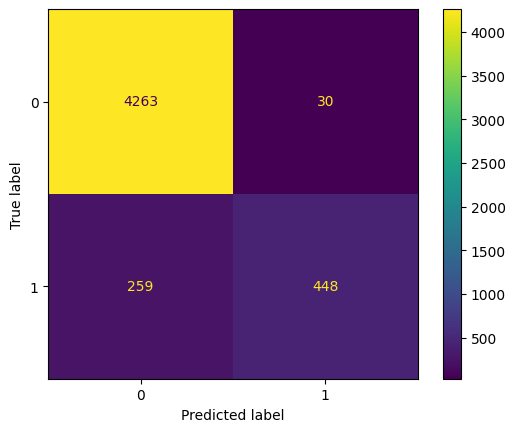

In [22]:
# Daniel: Plot the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_data, y_pred)

# use matplotlib to plot the cm

import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [23]:
# display the accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print("Accuracy:", accuracy_score(y_data, y_pred))
print("Precision:", precision_score(y_data, y_pred, average='weighted'))
print("Recall:", recall_score(y_data, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_data, y_pred, average='weighted'))


Accuracy: 0.9422
Precision: 0.9419487428267938
Recall: 0.9422
F1 Score: 0.937365882569747


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above.
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the df and with KNN the model *is* the df. We will learn how to avoid this pitfall in the next lecture.

In [25]:
knn2 = KNeighborsClassifier(n_neighbors=5, weights='distance')

# fit the model
knn2.fit(X_data, y_data)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [26]:
# make prediction

y_pred2 = knn2.predict(X_data)

In [27]:
# show results with accuracy, recall, ...

print("Accuracy:", accuracy_score(y_data, y_pred2))
print("Precision:", precision_score(y_data, y_pred2, average='weighted'))
print("Recall:", recall_score(y_data, y_pred2, average='weighted'))
print("F1 Score:", f1_score(y_data, y_pred2, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


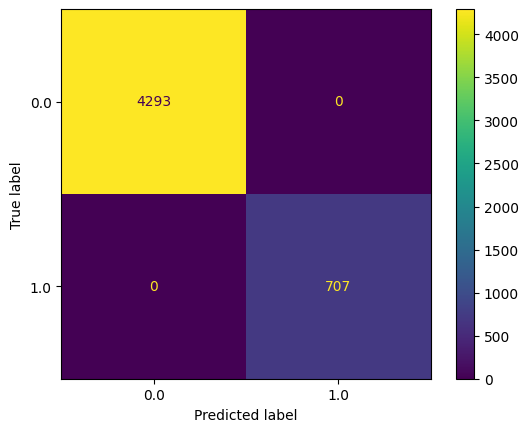

In [29]:
# show confusion matrix

cm2 = confusion_matrix(y_data, y_pred2)

# plot confusion matrix

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=knn2.classes_)

disp2.plot()
plt.show()

*Daniel*: Note that with the distance we get a perfect 100% score in every metric.

New model with uniform distance but $p=1$

In [31]:
knn3 = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=1)

knn3.fit(X_data, y_data)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
# make prediction & show results

y_pred3 = knn3.predict(X_data)

In [33]:
# show results

print("Accuracy:", accuracy_score(y_data, y_pred3))
print("Precision:", precision_score(y_data, y_pred3, average='weighted'))
print("Recall:", recall_score(y_data, y_pred3, average='weighted'))
print("F1 Score:", f1_score(y_data, y_pred3, average='weighted'))

Accuracy: 0.9356
Precision: 0.9354265375744644
Recall: 0.9356
F1 Score: 0.9292302171237694


*Daniel*: note the lower accuracy

## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [34]:
def get_accuracy_knn(k, X_data, y_data):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_data, y_data)
    return knn.score(X_data, y_data)

In [36]:
res = [get_accuracy_knn(k, X_data, y_data) for k in range(1, 21)]

for k in range(1, 21):
    print(f"Accuracy for k={k}:", res[k-1])

Accuracy for k=1: 1.0
Accuracy for k=2: 0.9292
Accuracy for k=3: 0.9422
Accuracy for k=4: 0.9154
Accuracy for k=5: 0.9284
Accuracy for k=6: 0.9156
Accuracy for k=7: 0.9254
Accuracy for k=8: 0.9122
Accuracy for k=9: 0.9224
Accuracy for k=10: 0.9092
Accuracy for k=11: 0.9158
Accuracy for k=12: 0.9076
Accuracy for k=13: 0.9148
Accuracy for k=14: 0.905
Accuracy for k=15: 0.9098
Accuracy for k=16: 0.9044
Accuracy for k=17: 0.908
Accuracy for k=18: 0.9028
Accuracy for k=19: 0.9078
Accuracy for k=20: 0.902


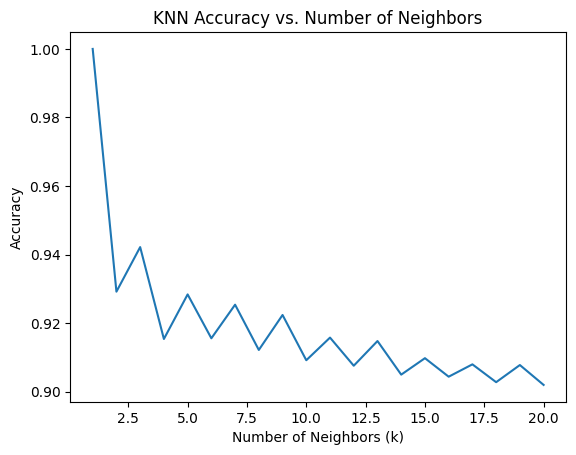

In [37]:
# plot accuracy vs k

plt.plot(range(1, 21), res)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.show()

*Daniel*: note the for $k=1$ the accuracy is $=1$ meaning perfect score, this is because with $k=1$ the model is simply memorizing the training data.

# Now with Iris

Load, shuffle and split Iris df (Lesson 1)
... don´t forget scaling features

In [ ]:
filepath = DATA_PATH + 'Iris_Data.csv'
df = pd.read_csv(filepath)
print(df.columns,df.shape)
df

X = frames,
y = target

In [ ]:
y = df.pop('species').to_frame()
X = df

In [ ]:
X,y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y,stratify=y, test_size=0.75)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [ ]:
X_train,y_train

Train a k-NN classifier on the training df, test on the testing df, explore different settings, number of input features, accuracies, ..., compare with colleagues, write conclusions

In [ ]:
#Student writes code here